In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dishNetwork import DishNetwork
import numpy as np
import torch

simulating ANN of layers [1, 1, 1, 1]
creating 1 nodes
creating 1 nodes
connecting 1 neurons to 1 neurons
this took 0.020423469999999888 seconds
creating 1 nodes
connecting 1 neurons to 1 neurons
this took 0.024414882000000304 seconds
creating 1 nodes
connecting 1 neurons to 1 neurons
this took 0.0024370039999999094 seconds
creating stimulation
starting to record


/home/shachar/nestDocker/ANN2Neuron/clean/simulation/modules/dishNetwork.py:19: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[[{'type': 'spike_recorder',
   'times': array([ 47.8,  77. , 106.8, 136.6, 166.4, 196.2, 226. , 255.8, 285.6,
          315.4, 345.2, 375. , 404.8, 434.6, 464.4, 494.2, 524. , 553.8,
          583.6, 613.4, 643.2, 673. , 702.8, 732.6, 762.4, 792.2, 822. ,
          851.8, 881.6, 911.4, 941.2, 971. ]),
   'events': array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
          4, 4, 4, 4, 4, 4, 4, 4, 4, 4])}],
 [],
 [],
 []]

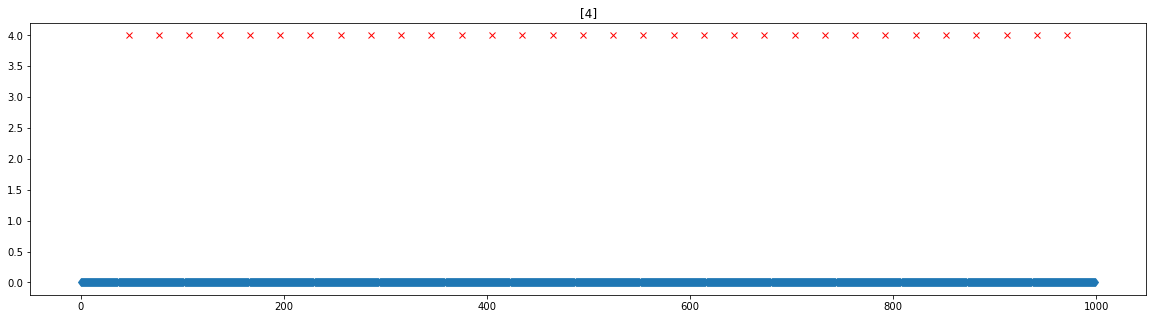

In [2]:
## simple line network that propegate the signal

net = DishNetwork([1,1,1,1],torch.tensor([[[1]],[[1]],[[1]]]))
net.stimulate()

simulating ANN of layers [2, 1]
creating 2 nodes
creating 1 nodes
connecting 2 neurons to 1 neurons
this took 0.0029034110000001334 seconds
creating stimulation
starting to record


[[{'type': 'spike_recorder',
   'times': array([ 32.2,  61.8,  91.6, 121.4, 151.2, 181. , 210.8, 240.6, 270.4,
          300.2, 330. , 359.8, 389.6, 419.4, 449.2, 479. , 508.8, 538.6,
          568.4, 598.2, 628. , 657.8, 687.6, 717.4, 747.2, 777. , 806.8,
          836.6, 866.4, 896.2, 926. , 955.8, 985.6]),
   'events': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])}],
 []]

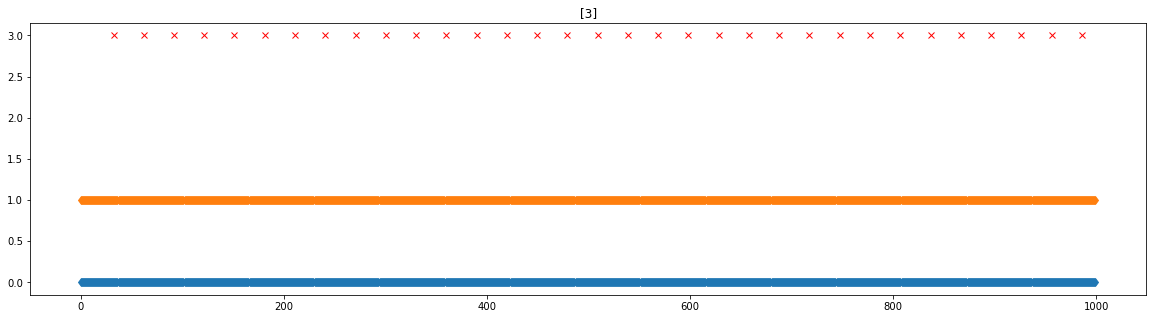

In [3]:
## 2 nodes connect to 1 node

net = DishNetwork([2,1],[[[1],[1]]])
net.stimulate()

simulating ANN of layers [1, 1]
creating 1 nodes
creating 1 nodes
connecting 1 neurons to 1 neurons
this took 0.0020984589999999415 seconds
connecting 1 neurons to 1 neurons
this took 0.002969949999999777 seconds
connecting 1 neurons to 1 neurons
this took 0.026986572999999403 seconds
creating stimulation
starting to record


[[{'type': 'spike_recorder',
   'times': array([ 13.6,  47. ,  80.4, 113.8, 147.2, 180.6, 214. , 247.4, 280.8,
          314.2, 347.6, 381. , 414.4, 447.8, 481.2, 514.6, 548. , 581.4,
          614.8, 648.2, 681.6, 715. , 748.4, 781.8, 815.2, 848.6, 882. ,
          915.4, 948.8, 982.2]),
   'events': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 2, 2, 2, 2, 2])}],
 []]

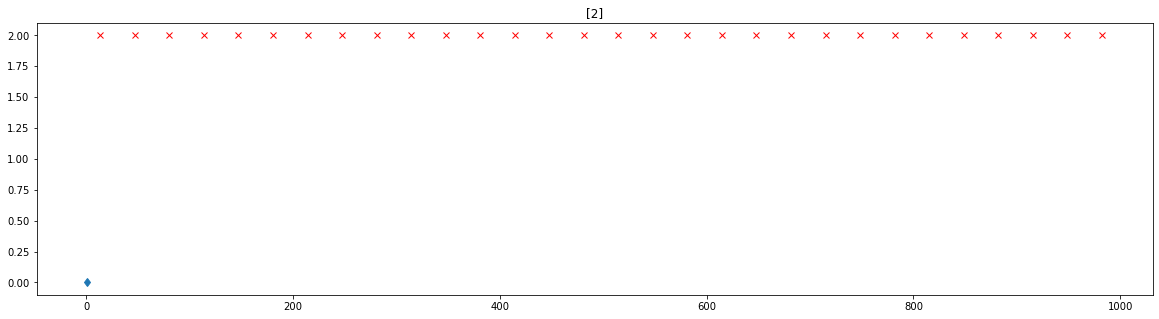

In [4]:
## small network with an RNN layer

net = DishNetwork([1,1],[([[1]],[[1]])])
net.stimulate(lambda i,t: 1 if t == 1 else 0,isSimple = False)

simulating ANN of layers [2, 1]
creating 2 nodes
creating 1 nodes
connecting 2 neurons to 1 neurons
this took 0.001355837000000193 seconds
creating stimulation
starting to record


[[{'type': 'spike_recorder',
   'times': array([ 42.6, 102.4, 162.4, 222.4, 282.4, 342.4, 402.4, 462.4, 522.4,
          582.4, 642.4, 702.4, 762.4, 822.4, 882.4, 942.4]),
   'events': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])}],
 []]

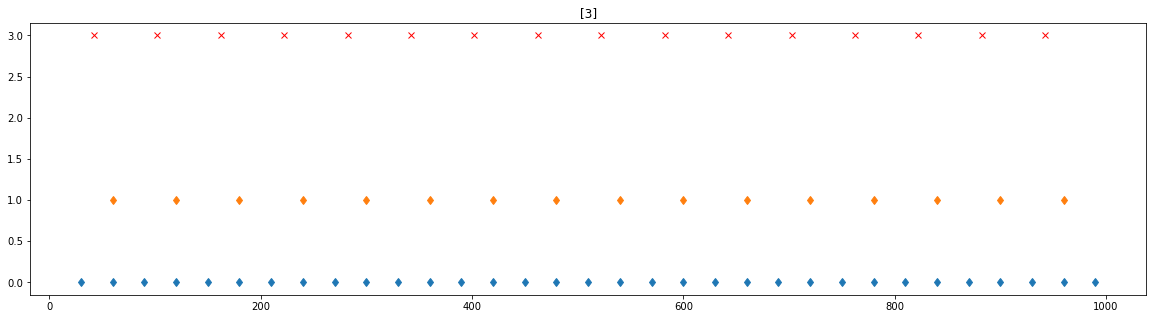

In [5]:
## inhibitory connections

net = DishNetwork([2,1],[[[1],[-1]]])
net.stimulate(lambda i,t: 1 if t % 30 == 0 and i == 0 else (1 if t % 60 == 0 and i == 1 else 0),isSimple = False)

In [6]:
## inhibitory connections disabling an RNN feedback loop

net = DishNetwork([2,1,1],[[[1],[-1]],([[1]],[[1]])])
net.stimulate([[10, 400, 800],[200, 600]])

simulating ANN of layers [2, 1, 1]
creating 2 nodes
creating 1 nodes
connecting 2 neurons to 1 neurons
this took 0.026739059999998815 seconds
creating 1 nodes
connecting 1 neurons to 1 neurons
this took 0.0005970539999999858 seconds
connecting 1 neurons to 1 neurons
this took 0.0009819039999996448 seconds
connecting 1 neurons to 1 neurons
this took 0.0005555390000004934 seconds
creating stimulation


ValueError: expected sequence of length 3 at dim 1 (got 2)

In [ ]:
## exitory vs inhibitory

net = DishNetwork([6,1],[[[1],[1],[1],[-1],[-1],[-1]]])
net.stimulate([[100,200,300,400,500,600,700],[400,500,600,700],[600,700],[200,300,400,500,600,700],[300,500,600,700],[700]])